# Processing data

*By Joe Marcus and Arun Durvasula*

Here we process input genotype genotype for the GAN. We're starting with a very small example of ~100 europeans from the HGDP and ~50k ld pruned SNPs to play around. See John Novembre tutorial on population structure for more details on this test dataset ...

https://github.com/NovembreLab/HGDP_PopStruct_Exercise

# Imports

In [22]:
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline  

plt.style.use('ggplot')

# Read data

In [6]:
df = pd.read_table('../data/H938_Euro.LDprune.traw')
x = df.drop(['CHR', 'SNP', '(C)M', 'POS', 'COUNTED', 'ALT'], axis=1).as_matrix()
x.shape

(59477, 124)

# Remove missing data

In [7]:
x = x[~np.isnan(x).any(axis=1)]
x.shape

(59475, 124)

# Run pca 

make the data looks good (compared to smartpca file:///Users/josephmarcus/Downloads/PopGenWorkshop.pdf) 

In [20]:
pca = PCA(n_components=2)
pca.fit(x.T)
v = pca.transform(x.T)
v.shape

(124, 2)

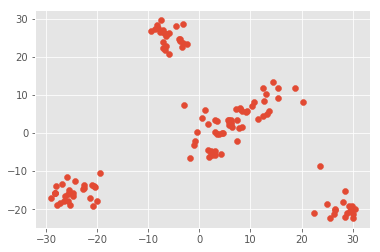

In [23]:
plt.scatter(v[:, 0], v[:, 1])

# Normalize and save genotype matrix

lets also subsample the data to 10k rows so we can push it to github

In [28]:
np.random.seed(1990)
z = sk.preprocessing.scale(x)
z_samp = z[np.random.choice(z.shape[0], 10000, replace=False)] 
np.save('../data/H938_Euro.LDprune', z_samp)

In [29]:
plt.hist(z[]

array([[-0.7712735 , -0.77340905, -0.77828869, ..., -0.76039217,
        -0.76564082, -0.76747701],
       [ 0.68853274, -0.77340905, -0.77828869, ...,  0.68752754,
         0.68539761, -0.76747701],
       [ 0.68853274, -0.77340905, -0.77828869, ..., -0.76039217,
        -0.76564082,  2.13222729],
       ..., 
       [-0.7712735 , -0.77340905, -0.77828869, ...,  2.13544726,
        -0.76564082,  2.13222729],
       [-0.7712735 , -0.77340905, -0.77828869, ..., -0.76039217,
        -0.76564082, -0.76747701],
       [-0.7712735 , -0.77340905, -0.77828869, ..., -0.76039217,
        -0.76564082, -0.76747701]])